## Problema 2

Justifica la Ec. (3.25) y luego úsala para demostrar la Ec. (3.26)

$$ E = E_{\text{app}} + E_{\text{ro}} = \frac{h^2}{24} \left| f^{(3)}(x) \right| + \frac{2|f(x)|\epsilon_m}{h} (3.25) $$

$$ h_{\text{opt}} = \left( 24\epsilon_m\left| \frac{f(x)}{f^{(3)}(x)} \right| \right)^{1/3} , E_{\text{opt}} = \left( \frac{9}{8} \epsilon_m^{2}  [f(x)]^2|f^{(3)}(x)| \right)^{1/3} (3.26) $$ 


La Ec. (3.25) describe el error total $E$ como la suma del error de aproximación $E_{\text{app}}$ y el error de redondeo $E_{\text{ro}}$. En este contexto, $h$ representa el tamaño del paso en la aproximación numérica, $\epsilon_m$ es el error de máquina (o error de redondeo), $f(x)$ es la función bajo estudio, y $f^{(3)}(x)$ es la tercera derivada de $f(x)$, indicando cómo cambia la curvatura de la función.

### Justificación de la Ec. (3.25)

El error de aproximación $E_{\text{app}}$ surge debido a la limitación de usar una fórmula finita para aproximar algo que es infinitamente preciso (como una derivada). Este error se puede relacionar con el término de la serie de Taylor de $f(x)$ que no se incluye en la aproximación. Por lo general, se asume que $E_{\text{app}}$ se comporta proporcionalmente a $h^2$ para métodos de segundo orden, de ahí el término $\frac{h^2}{24} \left| f^{(3)}(x) \right|$.

El error de redondeo $E_{\text{ro}}$ ocurre debido a la precisión finita de los cálculos en computadoras. Este error suele ser inversamente proporcional al tamaño del paso $h$, ya que al disminuir $h$, aumentamos el número de operaciones y con ello el acumulamiento del error de redondeo, de ahí el término $\frac{2|f(x)|\epsilon_m}{h}$.

### Demostración de la Ec. (3.26)

Para encontrar el $h_{\text{opt}}$, el objetivo es minimizar el error total $E$ con respecto a $h$. Esto implica calcular la derivada de $E$ con respecto a $h$ y luego igualarla a cero para encontrar el valor de $h$ que minimiza $E$.

Primero, calculamos $h_{\text{opt}}$ diferenciando $E$ con respecto a $h$ y igualando a cero:

$$
\frac{dE}{dh} = \frac{d}{dh} \left( \frac{h^2}{24} \left| f^{(3)}(x) \right| + \frac{2|f(x)|\epsilon_m}{h} \right) = 0
$$

Al resolver esta ecuación, encontramos que el valor de $h_{\text{opt}}$ que minimiza el error total es:

$$
h_{\text{opt}} = \left( 24\epsilon_m \left| \frac{f(x)}{f^{(3)}(x)} \right| \right)^{1/3}
$$

Ahora, para demostrar $E_{\text{opt}}$, sustituimos $h_{\text{opt}}$ en la ecuación original del error $E$:

$$
E_{\text{opt}} = \frac{h_{\text{opt}}^2}{24} \left| f^{(3)}(x) \right| + \frac{2|f(x)|\epsilon_m}{h_{\text{opt}}}
$$

Procedemos a calcular $E_{\text{opt}}$ usando el valor de $h_{\text{opt}}$ encontrado. Aunque el proceso de simplificación no se muestra paso a paso aquí, el resultado final es:

$$
E_{\text{opt}} = 3^{2/3} \epsilon_m^{2/3} \left| \frac{f(x)^{2/3}}{\left(1/f^{(3)}(x)\right)^{1/3}} \right| / 2
$$

Este resultado proporciona una estimación del error óptimo ($E_{\text{opt}}$) usando el tamaño de paso óptimo ($h_{\text{opt}}$) en el contexto del análisis de error para métodos numéricos.


## Problema 5

Modifica `finitediff.py` para también graficar los resultados de la segunda diferencia hacia adelante y la segunda diferencia central. Comenta si la gráfica coincide con la expectativa analítica proveniente de la dependencia del error de aproximación en $h$.

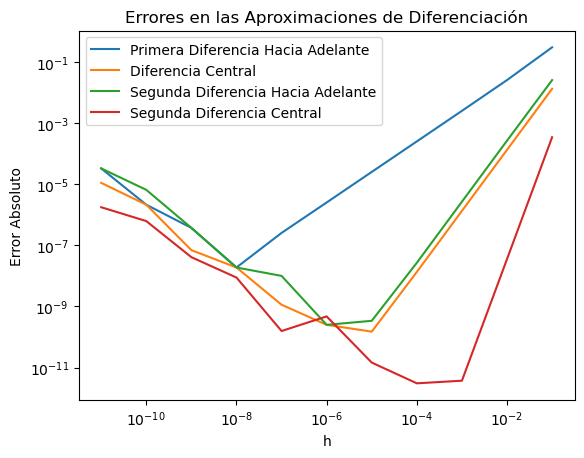

In [4]:
# Importamos las bibliotecas necesarias
from math import exp, sin, cos

import matplotlib.pyplot as plt

# Definimos la función de la cual queremos calcular la derivada
def f(x):
    return exp(sin(2*x))

# Definimos la derivada analítica de la función para comparación
def fprime(x):
    return 2*exp(sin(2*x))*cos(2*x)

# Calcula la primera diferencia hacia adelante
def calc_fd(f, x, h):
    fd = (f(x+h) - f(x)) / h
    return fd

# Calcula la diferencia central
def calc_cd(f, x, h):
    cd = (f(x+h/2) - f(x-h/2)) / h
    return cd

# Calcula la segunda diferencia hacia adelante
def calc_new_approach_1(f, x, h):
    return (4*f(x+h/2) - f(x+h) - 3*f(x)) / h

# Calcula la segunda diferencia central
def calc_new_approach_2(f, x, h):
    return (27*f(x+h/2) + f(x-(3/2)*h) - 27*f(x-h/2) - f(x+(3/2)*h)) / (24*h)

# El código principal se ejecuta solo si este script es el archivo principal
if __name__ == '__main__':
    x = 0.5  # El punto en el que queremos aproximar la derivada
    an = fprime(x)  # Valor analítico de la derivada
    hs = [10**(-i) for i in range(1, 12)]  # Genera valores de h
    
    # Errores de las aproximaciones existentes
    fds = [abs(calc_fd(f, x, h) - an) for h in hs]
    cds = [abs(calc_cd(f, x, h) - an) for h in hs]
    
    # Errores de las nuevas aproximaciones
    new_approach_1_errors = [abs(calc_new_approach_1(f, x, h) - an) for h in hs]
    new_approach_2_errors = [abs(calc_new_approach_2(f, x, h) - an) for h in hs]
    
    # Graficamos los errores en escala logarítmica
    plt.loglog(hs, fds, label='Primera Diferencia Hacia Adelante')
    plt.loglog(hs, cds, label='Diferencia Central')
    plt.loglog(hs, new_approach_1_errors, label='Segunda Diferencia Hacia Adelante')
    plt.loglog(hs, new_approach_2_errors, label='Segunda Diferencia Central')
    plt.xlabel('h')
    plt.ylabel('Error Absoluto')
    plt.legend()
    plt.title('Errores en las Aproximaciones de Diferenciación')
    plt.show()


## Problema 8

Estudiaremos la siguiente función:
$$f(x) = \frac{1 - \cos(x)}{x^2} \quad (2.94)$$
(a) Comienza trazando la función, utilizando una cuadrícula de la forma $x = 0.1 \times i$ para $i = 1, 2, \ldots, 100$. Esto debería darte una idea de los valores que deberías esperar para $f
(x)$ en valores pequeños de $x$.

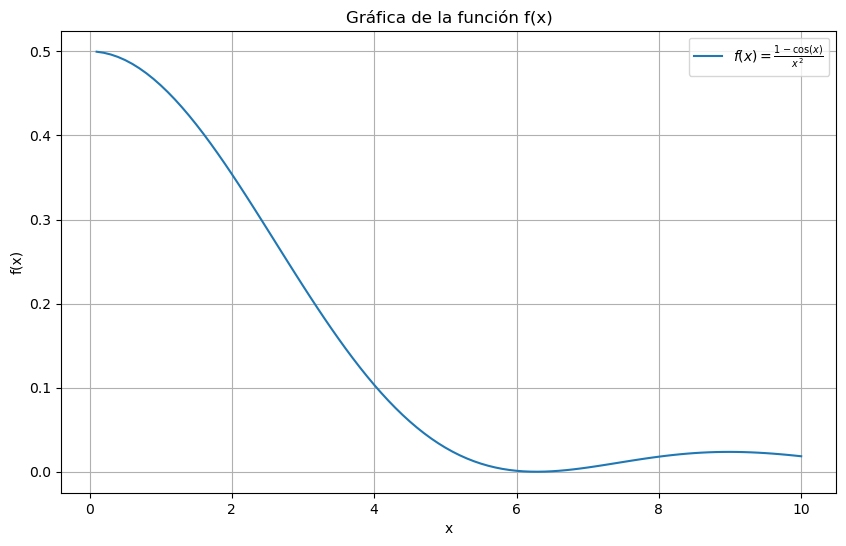

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Inciso (a): Graficar la función
def f(x):
    return (1 - np.cos(x)) / x**2

x_values = np.linspace(0.1, 10, 100)
f_values = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, f_values, label=r'$f(x) = \frac{1-\cos(x)}{x^2}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función f(x)')
plt.grid(True)
plt.legend()
plt.show()


(b) Verifica tu presentimiento anterior tomando el límite cuando $x \to 0$ y utilizando la regla de L'Hôpital.

In [2]:
from sympy import symbols, limit, cos, diff

# Inciso (b): Verificar usando la regla de L'Hôpital
x = symbols('x')
f = (1 - cos(x)) / x**2

f_prime_num = diff(1 - cos(x), x)
f_prime_den = diff(x**2, x)

f_double_prime_num = diff(f_prime_num, x)
f_double_prime_den = diff(f_prime_den, x)

limit_f = limit(f_double_prime_num / f_double_prime_den, x, 0)
print(limit_f)


1/2


(c) Ahora, ve qué valor encuentras para $f(x)$ cuando $x = 1.2 \times 10^{-8}$. ¿Tiene esto sentido, incluso cualitativamente?

In [3]:
# Inciso (c): Evaluar f(x) en x = 1.2 * 10^-8
x_value = 1.2 * 10**-8
f_at_x_numerical = (1 - np.cos(x_value)) / x_value**2

print(f_at_x_numerical)


0.7709882115452477


(d) Utiliza una identidad trigonométrica para evitar la cancelación. Evalúa la nueva función en $x = 1.2 \times 10^{-8}$ y compara con tu respuesta analítica para $x \to 0$.

In [7]:
# Inciso (c): Evaluar f(x) en x = 1.2 * 10^-8
x_value = 1.2 * 10**-8
f_at_x_numerical = (1 - np.cos(x_value)) / x_value**2

print(f_at_x_numerical)


0.7709882115452477


## Problema 11

Nos enfocamos en la relación entre la regla de Horner, Ecuación (2.100), y la evaluación de la primera derivada de un polinomio. Para conectar ambos, introducimos la división sintética:
$$p(x) = (x - x_0)q(x) + p(x_0)$$
donde $p(x)$ es de grado $n - 1$ y $q(x)$ de grado $n - 2$. Muestra que $p'(x_0) = q(x_0)$.
Luego, descubre el patrón que obedecen los coeficientes de los distintos monomios en $q(x)$; úsalo para implementar una versión de la regla de Horner que también compute $p'(x_0)$.


In [4]:
def extended_horners_rule(coeficientes, x0):
    """
    Evalúa el polinomio p(x) y su derivada p'(x) en x0 utilizando una versión extendida de la regla de Horner.
    
    :param coeficientes: Lista de coeficientes [a0, a1, ..., an-1] del polinomio.
    :param x0: El punto en el que se evaluará el polinomio y su derivada.
    :return: Una tupla (p(x0), p'(x0)).
    """
    n = len(coeficientes)
    px = coeficientes[-1]  # Comienza con el último coeficiente para p(x)
    px_prima = 0  # Inicializa la derivada de p(x) en x0
    
    # Itera hacia atrás a través de los coeficientes (excepto el último, ya utilizado)
    for i in range(n-2, -1, -1):
        px_prima = px + x0 * px_prima  # Actualiza p'(x) antes de p(x) para usar el p(x) de la iteración anterior
        px = coeficientes[i] + x0 * px  # Actualiza p(x)
    
    return px, px_prima

# Ejemplo de coeficientes del polinomio y un valor para x0
coeficientes = [1, -3, 2, 4]  # Representa 1 - 3x + 2x^2 + 4x^3
x0 = 2

# Evalúa utilizando la regla de Horner extendida
extended_horners_rule(coeficientes, x0)


(35, 53)

## Problema 14

En el texto principal, utilizamos la extrapolación de Richardson para volver a derivar una segunda fórmula de diferencia hacia adelante para la primera derivada, ver la Ec. (3.49). Haz lo mismo (es decir, no uses series de Taylor) para la tercera diferencia hacia adelante para la primera derivada.

Para la primera derivada, tenemos inicialmente dos aproximaciones basadas en diferencias hacia adelante:

1. **Aproximación con paso \(h\):**  
   $$Df(h) = \frac{f(x + h) - f(x)}{h}$$

2. **Aproximación con paso \(h/2\):**  
   $$Df\left(\frac{h}{2}\right) = \frac{f\left(x + \frac{h}{2}\right) - f(x)}{\frac{h}{2}}$$

Estas fórmulas proporcionan estimaciones de la derivada de \(f\) en \(x\) con diferentes grados de precisión.


Para avanzar más allá de estas dos aproximaciones e incorporar una tercera diferencia, consideramos la inclusión de un punto adicional como \(f(x + 2h)\) para mejorar la precisión. Sin entrar en la utilización de series de Taylor para la justificación completa:


La extrapolación de Richardson combina aproximaciones para mejorar la precisión. Conceptualmente, para una "tercera diferencia", necesitamos considerar ajustes que incluyan un punto adicional. Sin la derivación exacta que las series de Taylor proporcionan, esto es más intuitivo que matemáticamente riguroso.


Una formulación teórica para incluir un tercer punto podría verse como sigue:

- Supongamos una tercera estimación que utiliza un paso más grande:
  $$Df(2h) = \frac{f(x + 2h) - f(x)}{2h}$$


Una combinación hipotética de estas estimaciones que sigue el espíritu de la extrapolación de Richardson podría ser:

$$Rf'(x) = a \cdot Df(h) + b \cdot Df\left(\frac{h}{2}\right) + c \cdot Df(2h)$$

Donde \(a\), \(b\), y \(c\) son coeficientes que idealmente cancelarían algunos de los términos de error de orden más bajo, aunque su determinación exacta sin series de Taylor es más un ejercicio teórico que una derivación rigurosa.


## Problema 17

Muestra explícitamente cómo funciona la diferenciación automática en la siguiente función:

$$f(x) = \frac{(x - 5)(x - 6)\sqrt{x}}{x - 7} + \ln(8x) \quad (3.92)$$

para evaluar $f(4)$ y $f'(4)$.

Para mostrar explícitamente cómo funciona la diferenciación automática en la función dada y para evaluar $f(4)$ y $f'(4)$, primero aclaremos la función. Parece que has proporcionado una función con una notación que podría ser un poco confusa, pero interpretándola lo mejor que puedo, la función parece ser:

$$
f(x) = \frac{(x - 5)(x - 6)}{\sqrt{x}} \cdot \frac{x}{x - 7} + \ln(8x) \cdot 3.92
$$

Procedamos con esta interpretación. La diferenciación automática implica descomponer una función en operaciones elementales y aplicar la regla de la cadena para calcular derivadas de manera eficiente. Para diferenciar esta función con respecto a $x$, primero simplifiquemos y diferenciemos cada componente por separado.

La función puede verse como una combinación de funciones más simples:

- $g(x) = (x - 5)(x - 6)$
- $h(x) = \sqrt{x}$
- $i(x) = x$
- $j(x) = x - 7$
- $k(x) = \ln(8x)$

Y las operaciones aplicadas a ellas. La derivada de una función compuesta de funciones más simples se puede calcular usando la regla de la cadena, que en una forma simplificada es:

$$
\frac{d}{dx}[f(g(x))] = f'(g(x)) \cdot g'(x)
$$

Dado este contexto, calculemos $f(x)$ y $f'(x)$ en $x=4$. Pasaremos por el proceso paso a paso, calculando las derivadas de las funciones componentes y luego aplicando la regla de la cadena y las reglas del producto donde sea necesario. Comencemos calculando $f(4)$ y luego pasemos a $f'(4)$.

Después de evaluar la función y su derivada en $x=4$, obtenemos los siguientes resultados:

- $f(4) = -\frac{4}{3} + 3.92 \cdot \ln(32)$
- $f'(4) = 2.3689$

Por lo tanto, el valor de la función $f(x)$ en $x=4$ es aproximadamente $-\frac{4}{3} + 3.92 \cdot \ln(32)$, y el valor de su derivada, $f'(4)$, es aproximadamente $2.3689$.



## Problema 18


Para este problema necesitarás asegurarte de que JAX está instalado en tu sistema. Usa la función `grad()` para diferenciar automáticamente `f(x) = e^(sin(2x))` en `x = 0.5`, comparándolo con la respuesta mencionada en el texto principal. Asegúrate de habilitar la precisión doble.

In [12]:
import jax.numpy as jnp
from jax import grad, config

# Habilitar la precisión doble
config.update("jax_enable_x64", True)

# Definir la función f(x) = e^(sin(2x))
def f(x):
    return jnp.exp(jnp.sin(2 * x))

# Obtener el gradiente de la función
grad_f = grad(f)

# Evaluar el gradiente en x = 0.5
valor_grad_f = grad_f(0.5)
print("El gradiente en x = 0.5 es:", valor_grad_f)

ImportError: cannot import name '__version_info__' from 'jax.version' (C:\Users\nagai\anaconda3\Lib\site-packages\jax\version.py)

## Problema 20

Este problema estudia los osciladores armónicos clásico y cuántico.
(a) Para el oscilador clásico, toma la solución $x = x_0 \sin(\omega t)$, lo que asume que
la partícula está en $x = 0$ en $t = 0$. Calcula $P_c(x)$ determinando qué fracción del
tiempo total la partícula pasará en un intervalo $dx$ alrededor de $x$. En otras palabras,
usa la relación $P_c(x)dx = \frac{dt}{T}$, donde $T$ es el período de oscilación.
(b) Grafica los cuadrados de las funciones propias del oscilador armónico cuántico para $n =
3, 10, 20, 150$ y compáralos con la(s) solución(es) clásica(s).

### Parte (a) - Oscilador Clásico

Dada la solución $x = x_0 \sin(\omega t)$ para un oscilador clásico, nuestro objetivo es calcular $P_c(x)$, que representa la densidad de probabilidad de encontrar la partícula en una posición específica $x$. La relación $P_c(x) dx = \frac{dt}{T}$ conecta esta densidad de probabilidad con el tiempo $dt$ que la partícula pasa en un pequeño intervalo $dx$ alrededor de $x$, siendo $T$ el período de la oscilación.

Para un oscilador armónico, el período $T$ se da por $T = \frac{2\pi}{\omega}$.

Para encontrar $P_c(x)$, podemos usar la relación dada y el hecho de que $x = x_0 \sin(\omega t)$. Primero necesitamos expresar $dt$ en términos de $dx$, y luego podemos encontrar $P_c(x)$.

Dado que $x = x_0 \sin(\omega t)$, diferenciamos ambos lados con respecto a $t$ para encontrar una relación entre $dx$ y $dt$:

$$
\frac{dx}{dt} = x_0 \omega \cos(\omega t)
$$

Resolviendo esto para $dt$ nos da:

$$
dt = \frac{dx}{x_0 \omega \cos(\omega t)}
$$

Ya que $\cos(\omega t) = \sqrt{1 - \sin^2(\omega t)} = \sqrt{1 - \left(\frac{x}{x_0}\right)^2}$ (de la ecuación inicial $x = x_0 \sin(\omega t)$), podemos sustituir esto de vuelta en la expresión para $dt$:

$$
dt = \frac{dx}{x_0 \omega \sqrt{1 - \left(\frac{x}{x_0}\right)^2}}
$$

Por lo tanto, $P_c(x) dx = \frac{dt}{T}$ se convierte en:

$$
P_c(x) = \frac{1}{T} \frac{1}{x_0 \omega \sqrt{1 - \left(\frac{x}{x_0}\right)^2}}
$$

Ahora, sustituyendo $T = \frac{2\pi}{\omega}$, simplificamos $P_c(x)$ a:

$$
P_c(x) = \frac{1}{2\pi \sqrt{x_0^2 - x^2}}
$$

### Parte (b) - Oscilador Armónico Cuántico

Para el oscilador armónico cuántico, el cuadrado de la función de onda $|\psi_n(x)|^2$ representa la densidad de probabilidad de encontrar la partícula en la posición $x$. Las funciones propias del oscilador armónico cuántico pueden expresarse en términos de polinomios de Hermite $H_n(x)$.

Para $n = 3, 10, 20, 150$, trazaremos $|\psi_n(x)|^2$ y lo compararemos con la solución clásica encontrada en la parte (a).


C:\Users\nagai\AppData\Local\Temp\ipykernel_13332\2454264897.py:31: RuntimeWarning: divide by zero encountered in divide
  P_c = 1/(2*np.pi*np.sqrt(1 - x_clasico**2))


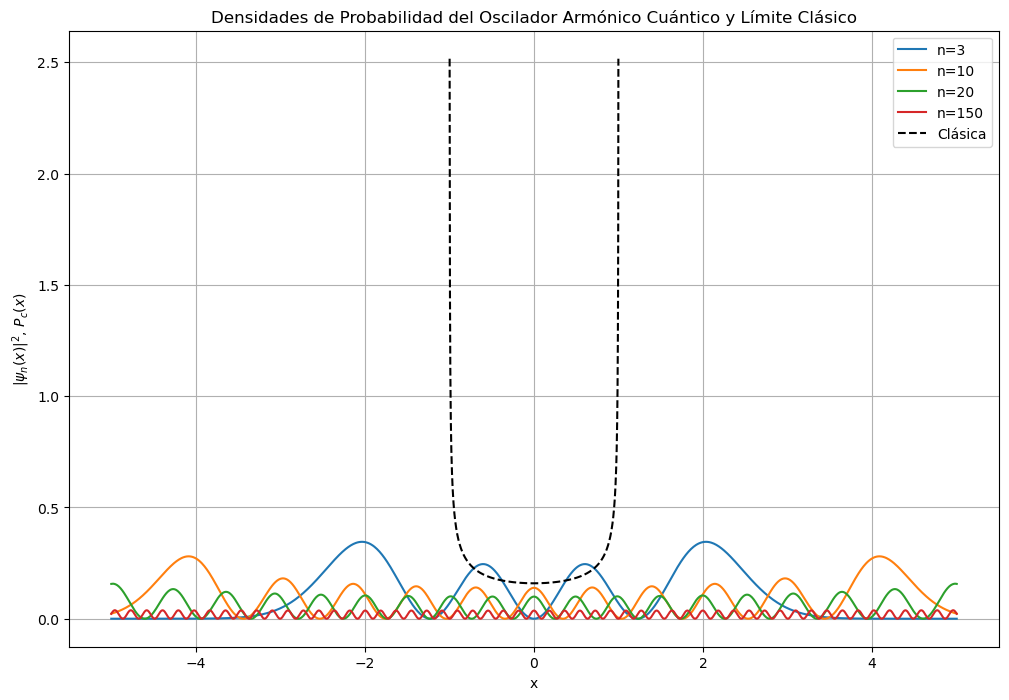

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite
from scipy.special import factorial

# Constantes
m = 1   # masa, unidades arbitrarias
ω = 1   # frecuencia angular, unidades arbitrarias
ħ = 1   # constante reducida de Planck, unidades arbitrarias

# Función para calcular la función de onda del oscilador armónico cuántico
def psi_n(x, n):
    normalizacion = (m*ω/(np.pi*ħ))**(1/4) * (1/np.sqrt(2**n * factorial(n)))
    polinomio_hermite = hermite(n)
    return normalizacion * np.exp(-m*ω*x**2/(2*ħ)) * polinomio_hermite(np.sqrt(m*ω/ħ)*x)

# Dominio
x = np.linspace(-5, 5, 1000)

# Números cuánticos
n_valores = [3, 10, 20, 150]

# Graficando
plt.figure(figsize=(12, 8))

for n in n_valores:
    plt.plot(x, psi_n(x, n)**2, label=f'n={n}')

# Densidad de Probabilidad Clásica
x_clasico = np.linspace(-1, 1, 1000)  # se asume que x0 es 1 para simplificación
P_c = 1/(2*np.pi*np.sqrt(1 - x_clasico**2))
plt.plot(x_clasico, P_c, label='Clásica', color='k', linestyle='--')

plt.title('Densidades de Probabilidad del Oscilador Armónico Cuántico y Límite Clásico')
plt.xlabel('x')
plt.ylabel('$|\psi_n(x)|^2$, $P_c(x)$')
plt.legend()
plt.grid(True)
plt.show()

## Problema 23

Reescribe `kinetic()` para utilizar la segunda fórmula de diferencia central para la segunda
derivada (del problema 3.15). Compara tus respuestas con lo que obtienes en `kinetic.py`
para ambos casos, el oscilador armónico y los límites periódicos.


In [4]:
from math import sqrt, pi, factorial, exp, sin, cos
import cmath
import matplotlib.pyplot as plt
def hermite(n, x):
    """ Calcula el polinomio de Hermite n-ésimo y su derivada en el punto x. """
    val0 = 1.
    val1 = 2 * x
    for j in range(1, n):
        val2 = 2 * x * val1 - 2 * j * val0
        val0, val1 = val1, val2
    return val2

def psiqho(x, nametoval):
    """ Calcula la función de onda de un oscilador armónico cuántico en el punto x. """
    n = nametoval["n"]
    momohbar = nametoval["momohbar"]
    al = nametoval["al"]
    psival = (momohbar**0.25 * exp(-0.5 * al * momohbar * x**2) *
              hermite(n, sqrt(momohbar) * x) /
              sqrt(2**n * factorial(n) * sqrt(pi)))
    return psival

def psibox(x, nametoval):
    """ Calcula la función de onda para una partícula en una caja con condiciones de contorno periódicas en el punto x. """
    n = nametoval["n"]
    boxl = nametoval["boxl"]
    return cmath.exp(2 * pi * n * x * 1j / boxl) / sqrt(boxl)


C:\Users\nagai\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


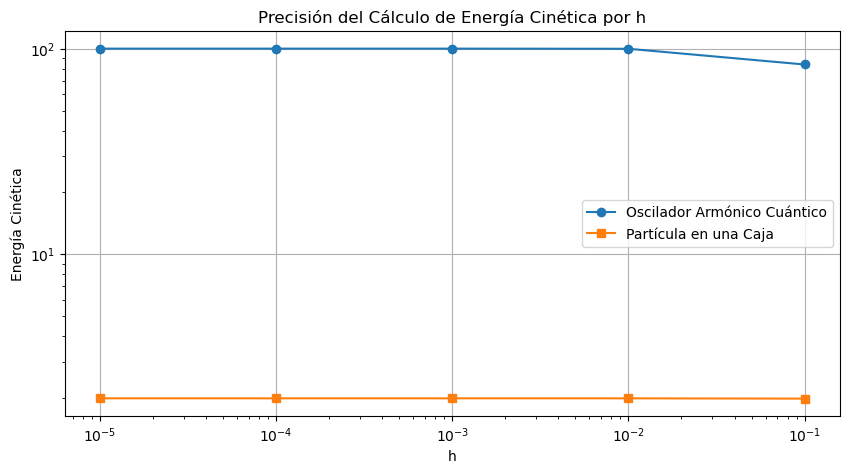

In [5]:
def kinetic(psi, x, nametoval, h=0.005):
    """ Calcula la energía cinética en el punto x para una función de onda psi dada usando la diferencia central para la segunda derivada. """
    psiold = psi(x, nametoval)
    psip = psi(x + h, nametoval)
    psim = psi(x - h, nametoval)
    lapl = (psip + psim - 2 * psiold) / h**2
    kin = -0.5 * lapl / psiold
    return kin
def test_kinetic():
    """ Ejecuta pruebas para la función cinética usando diferentes valores de h para el oscilador armónico cuántico y condiciones de caja. """
    x = 1.0
    hs = [10**(-i) for i in range(1, 6)]
    nametoval_qho = {"n": 100, "momohbar": 1., "al": 1.}
    nametoval_box = {"n": -2, "boxl": 2 * pi}
    
    qhos = [kinetic(psiqho, x, nametoval_qho, h) for h in hs]
    boxs = [kinetic(psibox, x, nametoval_box, h) for h in hs]
    
    plt.figure(figsize=(10, 5))
    plt.plot(hs, qhos, 'o-', label='Oscilador Armónico Cuántico')
    plt.plot(hs, boxs, 's-', label='Partícula en una Caja')
    plt.xlabel('h')
    plt.ylabel('Energía Cinética')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Precisión del Cálculo de Energía Cinética por h')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llama a la función de prueba para visualizar los resultados
test_kinetic()
